<a href="https://colab.research.google.com/github/Saurav-Raghaw/Optimization/blob/main/LPID_vs_PID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import numpy as np

In [2]:
def func(x1, x2):
  return 0.1*x1**2 + 2*x2**2

In [3]:
def grad_func_x1(x1):
  return 0.2*x1

In [4]:
def grad_func_x2(x2):
  return 4*x2

In [5]:
def PID(lr=0.05, Kd=0.9):
  x1, x2 = -10, -10 #parameters
  gamma = 0.9	

  log = [] # lists to store learning process

  x1_prev,x2_prev = x1, x2
  grad_x1, grad_x2 = 0,0
  mt_x1, dt_x1, mt_x2, dt_x2 = 0,0,0,0

  prev_grad_x1, prev_grad_x2 = 0,0
  prev_mt_x1, prev_mt_x2, prev_dt_x1, prev_dt_x2 =0,0,0,0

  t=0

  while(1):
    t=t+1

    grad_x1 = grad_func_x1(x1)
    grad_x2 = grad_func_x2(x2)

    mt_x1 = gamma*prev_mt_x1 + lr*grad_x1
    dt_x1 = gamma*prev_dt_x1 + (1-gamma)*(grad_x1 - prev_grad_x1)

    prev_mt_x1 = mt_x1
    prev_dt_x1 = dt_x1
    prev_grad_x1 = grad_x1

    mt_x2 = gamma*prev_mt_x2 + lr*grad_x2
    dt_x2 = gamma*prev_dt_x2 + (1-gamma)*(grad_x2 - prev_grad_x2)

    prev_mt_x2 = mt_x2
    prev_dt_x2 = dt_x2
    prev_grad_x2 = grad_x2

    log.append((x1,x2))

    x1_prev = x1
    x2_prev = x2

    x1 = x1 - mt_x1 - Kd*dt_x1
    x2 = x2 - mt_x2 - Kd*dt_x2

    if(x1_prev == x1 and x2_prev == x2):
      break

  return x1, x2, log,t

In [6]:
def LPID(lr=0.05, Kd=0.9):
  x1, x2 = -10, -10 # parameters
  log = []  #list to store the value of x1 and x2 i.e learning 

  gamma =0.9 # momentum parameter
  eps = 1e-8

  prev_x1, prev_x2 = x1, x2
  grad_x1, grad_x2 = 0,0
  vt_x1, dt_x1, vt_x2, dt_x2 = 0,0,0,0

  prev_grad_x1, prev_grad_x2 = 0,0
  prev_vt_x1, prev_vt_x2, prev_dt_x1, prev_dt_x2 =0,0,0,0

  x1_look_ahead, x2_look_ahead = 0,0
  prev_x1_look_ahead, prev_x2_look_ahead = 0,0

  t = 0

  while(1):
    t+=1

    x1_look_ahead = x1 - gamma*prev_vt_x1
    x2_look_ahead = x2 - gamma*prev_vt_x2

    grad_x1 = grad_func_x1(x1_look_ahead)
    grad_x2 = grad_func_x2(x2_look_ahead)

    vt_x1 = gamma*prev_vt_x1 + (lr*grad_x1)
    vt_x2 = gamma*prev_vt_x2 + (lr*grad_x2)

    dt_x1 = gamma*prev_dt_x1 + (1-gamma)*(x1_look_ahead - prev_x1_look_ahead)
    dt_x2 = gamma*prev_dt_x2 + (1-gamma)*(x2_look_ahead - prev_x2_look_ahead)

    prev_grad_x1 = grad_x1
    prev_grad_x2 = grad_x2

    prev_vt_x1 = vt_x1
    prev_vt_x2 = vt_x2

    prev_x1_look_ahead = x1_look_ahead
    prev_x2_look_ahead = x2_look_ahead

    prev_dt_x1 = dt_x1
    prev_dt_x2 = dt_x2

    prev_x1 = x1
    prev_x2 = x2

    log.append((x1, x2))

    x1 = x1 - vt_x1 - Kd*dt_x1
    x2 = x2 - vt_x2 - Kd*dt_x2

    if(x1 == prev_x1 and x2 == prev_x2):
      break

  return x1, x2, log,t

In [7]:
def Adaptive_PID_Ada(lr = 0.05, Kd = 0.9):
  x1, x2 = -10, -10  #parametrs
  log = []  #list to store the value of x1 and x2 i.e learning process

  gamma =0.9 # momentum parameter
  eps = 1e-8

  x1_prev,x2_prev = x1, x2
  grad_x1, grad_x2 = 0,0
  mt_x1, dt_x1, mt_x2, dt_x2 = 0,0,0,0

  prev_grad_x1, prev_grad_x2 = 0,0
  prev_mt_x1, prev_mt_x2, prev_dt_x1, prev_dt_x2 =0,0,0,0

  vt_x1, vt_x2, prev_vt_x1, prev_vt_x2 = 0,0,0,0  #Introducing for accumulating the magnitude of the gradient

  t = 0

  while(1):    #Until Convergence
    t +=1

    grad_x1 = grad_func_x1(x1)
    grad_x2 = grad_func_x2(x2)

    vt_x1 = prev_vt_x1 + grad_x1**2  #Accumulating the magnitude of the gradient w.r.t first parameters
    mt_x1 = gamma*prev_mt_x1 + (lr*grad_x1)/math.sqrt(vt_x1 + eps)
    dt_x1 = gamma*prev_dt_x1 + (1-gamma)*(grad_x1 - prev_grad_x1)

    prev_grad_x1 = grad_x1
    prev_vt_x1 = vt_x1
    prev_mt_x1 = mt_x1
    prev_dt_x1 = dt_x1

    
    vt_x2 = prev_vt_x2 + grad_x2**2  #Accumulating the magnitude of the gradient w.r.t second parameters
    mt_x2 = gamma*prev_mt_x2 + (lr*grad_x2)/math.sqrt(vt_x2 + eps)
    dt_x2 = gamma*prev_dt_x2 + (1-gamma)*(grad_x2 - prev_grad_x2)

    prev_grad_x2 = grad_x2
    prev_vt_x2 = vt_x2
    prev_mt_x2 = mt_x2
    prev_dt_x2 = dt_x2

    prev_x1 = x1
    prev_x2 = x2

    log.append((x1, x2))

    x1 = x1 - mt_x1 - Kd*dt_x1
    x2 = x2 - mt_x2 - Kd*dt_x2

    if(x1 == prev_x1 and x2 == prev_x2):
      break

  return x1, x2, log,t

In [8]:
x1 = np.linspace(-10.0, 10.0, 100)
x2 = np.linspace(-10.0, 10.0, 100)
X1, X2 = np.meshgrid(x1, x2)
Y = costs1 = np.array([func(X1, X2) for X1, X2 in zip(X1, X2)])

In [9]:
%%time
x1, x2, log1,t = PID(lr=0.01, Kd=4) #Kd = 4


CPU times: user 67.5 ms, sys: 10.3 ms, total: 77.8 ms
Wall time: 81.4 ms


In [10]:
t

62654

In [11]:
%%time
x1, x2, log2,t = Adaptive_PID_Ada(lr=0.01, Kd=4) #Kd = 4


CPU times: user 5.59 s, sys: 178 ms, total: 5.77 s
Wall time: 5.8 s


In [12]:
t

3496319

In [13]:
%%time
x1, x2, log3,t = LPID(lr=0.01, Kd=4) #Kd = 4


CPU times: user 230 ms, sys: 4.8 ms, total: 235 ms
Wall time: 236 ms


In [14]:
t

184182

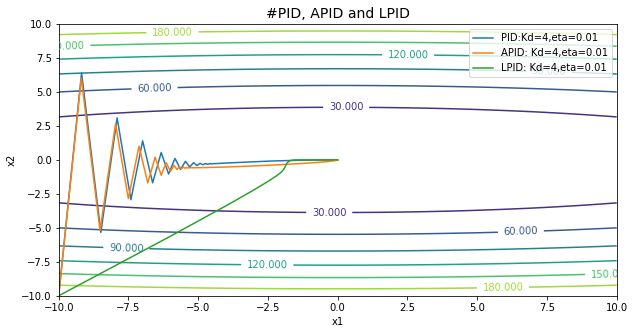

CPU times: user 3.36 s, sys: 200 ms, total: 3.56 s
Wall time: 3.5 s


In [15]:
%%time
x_val1 = [l[0] for l in log1]
y_val1 = [l[1] for l in log1]

x_val2 = [l[0] for l in log2]
y_val2 = [l[1] for l in log2]

x_val3 = [l[0] for l in log3]
y_val3 = [l[1] for l in log3]


plt.figure(figsize=(10,5))
'''
cp = plt.contour(X1, X2, Y, colors='black', linestyles='dashed', linewidths=1)
plt.clabel(cp, inline=1, fontsize=10)
cp = plt.contourf(X1, X2, Y, )
'''


cp = plt.contour(X1, X2, Y)
plt.clabel(cp, inline=1, fontsize=10)


plt.rcParams['figure.dpi'] = 227

plt.title('#PID, APID and LPID', fontSize=14)
plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_val1,y_val1, label='PID:Kd=4,eta=0.01')
plt.plot(x_val2,y_val2, label = 'APID: Kd=4,eta=0.01')
plt.plot(x_val3,y_val3, label = 'LPID: Kd=4,eta=0.01')


plt.legend()

plt.show()

In [ ]:
%%time
x1, x2, log1,t = PID(lr=0.01, Kd=0.5) #Kd = 4


In [ ]:
t

In [ ]:
%%time
x1, x2, log1,t = Adaptive_PID_Ada(lr=0.01, Kd=0.5) #Kd = 4


In [ ]:
t

In [ ]:
%%time
x1, x2, log1,t = LPID(lr=0.01, Kd=17) #Kd = 4


In [ ]:
t

In [ ]:
%%time
x_val1 = [l[0] for l in log1]
y_val1 = [l[1] for l in log1]

x_val2 = [l[0] for l in log2]
y_val2 = [l[1] for l in log2]

x_val3 = [l[0] for l in log3]
y_val3 = [l[1] for l in log3]


plt.figure(figsize=(10,5))
'''
cp = plt.contour(X1, X2, Y, colors='black', linestyles='dashed', linewidths=1)
plt.clabel(cp, inline=1, fontsize=10)
cp = plt.contourf(X1, X2, Y, )
'''


cp = plt.contour(X1, X2, Y)
plt.clabel(cp, inline=1, fontsize=10)


plt.rcParams['figure.dpi'] = 227

plt.title('#PID, APID and LPID', fontSize=14)
plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_val1,y_val1, label='PID:Kd=0.9,eta=0.01')
plt.plot(x_val2,y_val2, label = 'APID: Kd=0.9,eta=0.01')
plt.plot(x_val3,y_val3, label = 'LPID: Kd=0.9,eta=0.01')


plt.legend()

plt.show()